In [1]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [3]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ''.join(review)
    corpus.append(review)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()

In [5]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:, 1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.20)

In [7]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8600896860986547

In [8]:
y_pred = model.predict(X_test)

<AxesSubplot:>

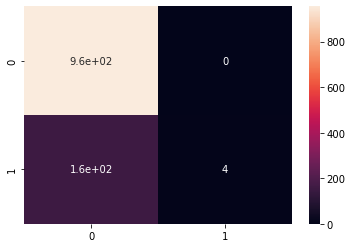

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot = True)

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8600896860986547
